In [1]:
#AI Project Part 1 
#================================================================================
#====  Group Members:                                                        ====
#=======  Muhammad Rohaan Atique - 20I-0410                                    ==
#=======  Ahmed Moiz - 20I-2603                                              ====
#================================================================================

#Imports
import sys
import numpy as np
import pandas as pd

In [2]:
#Definitions
training_data_folder = "training_data"
testing_data_folder = "testing_data"
order_data_start_date = "2016-01-01"
order_count = 3
data_classes = ["order_data", "cluster_map", "poi_data", "weather_data"]
#Col Definitions
order_table_cols = ["order_id", "driver_id", "passenger_id", "start_district_hash", "dest_district_hash", "Price", "Time"]
cluster_table_cols = ["district_hash", "district_id"]
poi_table_cols = ["district_hash", "poi_class"]
weather_table_cols = ["time", "weather", "temperature", "PM2.5"]


In [3]:
#Importing cluster map from training data
cluster_map = open(training_data_folder + "/" + data_classes[1] + "/" + data_classes[1], "r")
#Importing poi data from training data
poi_data = open(training_data_folder + "/" + data_classes[2] + "/" + data_classes[2], "r")

#Converting Cluster Map to Pandas DataFrame
cluster_map = cluster_map.read().splitlines()
cluster_map = [x.split("\t") for x in cluster_map]
cluster_map = pd.DataFrame(cluster_map, columns=cluster_table_cols)
print(cluster_map)
#===============================================================================
#Converting POI Data to Pandas DataFrame
#===============================================================================
poi_data = poi_data.read().splitlines()
#Apply split only to first 2 elements
poi_data = [x.split("\t", 1) for x in poi_data]
poi_data = pd.DataFrame(poi_data, columns=poi_table_cols)
print(poi_data)

                       district_hash district_id
0   90c5a34f06ac86aee0fd70e2adce7d8a           1
1   f2c8c4bb99e6377d21de71275afd6cd2           2
2   58c7a4888306d8ff3a641d1c0feccbe3           3
3   b26a240205c852804ff8758628c0a86a           4
4   4b9e4cf2fbdc8281b8a1f9f12b80ce4d           5
..                               ...         ...
61  a735449c5c09df639c35a7d61fad3ee5          62
62  0a5fef95db34383403d11cb6af937309          63
63  bf44d327f0232325c6d5280926d7b37d          64
64  825a21aa308dea206adb49c4b77c7805          65
65  1ecbb52d73c522f184a6fc53128b1ea1          66

[66 rows x 2 columns]
                       district_hash   
0   74c1c25f4b283fa74a5514307b0d0278  \
1   08f5b445ec6b29deba62e6fd8b0325a6   
2   4b7f6f4e2bf237b6cc58f57142bea5c0   
3   a814069db8d32f0fa6e188f41059c6e1   
4   8316146a6f78cc6d9f113f0390859417   
..                               ...   
61  d4ec2125aff74eded207d2d915ef682f   
62  82cc4851f9e4faa4e54309f8bb73fd7c   
63  fff4e8465d1e12621bc361276

In [4]:
#Create PD with weather data columns
weather_data = pd.DataFrame(columns=weather_table_cols)
#"2016-01-01"
#Loop till order_count
weather_data_start_date = order_data_start_date
#Deep copy of order count
weather_count = order_count

while(weather_count > 0):
    print("Adding File(weather): ", training_data_folder + "/" + data_classes[3] + "/" + data_classes[3] + "_" + weather_data_start_date)
    w_data = open(training_data_folder + "/" + data_classes[3] + "/" + data_classes[3] + "_" + str(weather_data_start_date), "r")
    w_data = w_data.read().splitlines()
    w_data = [x.split("\t") for x in w_data]
        #for each entry in w_data, add to weather_data
    for i in w_data:
        weather_data = pd.concat([weather_data, pd.DataFrame([i], columns=weather_table_cols)], ignore_index=True)

    #Increment the order_data_start_date by 1 day by changing the last 2 digits, also add 02 instead of 2
    weather_data_start_date = weather_data_start_date[:-2] + str(int(weather_data_start_date[-2:]) + 1).zfill(2)
    weather_count -= 1
    print("New Date: ", weather_data_start_date)

print(weather_data)

Adding File(weather):  training_data/weather_data/weather_data_2016-01-01
New Date:  2016-01-02
Adding File(weather):  training_data/weather_data/weather_data_2016-01-02
New Date:  2016-01-03
Adding File(weather):  training_data/weather_data/weather_data_2016-01-03
New Date:  2016-01-04
                    time weather temperature PM2.5
0    2016-01-01 00:00:28       1         4.0   177
1    2016-01-01 00:05:24       1         3.0   177
2    2016-01-01 00:10:08       1         3.0   177
3    2016-01-01 00:15:27       1         3.0   177
4    2016-01-01 00:20:06       1         3.0   177
..                   ...     ...         ...   ...
847  2016-01-03 23:35:02       2        14.0   192
848  2016-01-03 23:40:15       2        14.0   187
849  2016-01-03 23:45:28       2        13.0   187
850  2016-01-03 23:50:14       2        13.0   187
851  2016-01-03 23:55:26       2        13.0   187

[852 rows x 4 columns]


In [5]:
order_data = pd.DataFrame(columns=order_table_cols)

while(order_count > 0):
    print("Adding File(order): :", training_data_folder + "/" + data_classes[0] + "/" + data_classes[0] + "_" + order_data_start_date)
    o_data = open(training_data_folder + "/" + data_classes[0] + "/" + data_classes[0] + "_" + order_data_start_date, "r")
        #convert o_data to string
    o_data = o_data.read().splitlines()
    # print(o_data[0])
    o_data = [x.split("\t") for x in o_data]
    local_order_data = pd.DataFrame.from_records(o_data, columns=order_table_cols)
    # concat with order_data
    order_data = pd.concat([order_data, local_order_data], ignore_index=True)

    #Increment order_data_start_date by 1 day by changing the last 2 digits, also add 02 instead of 2
    order_data_start_date = order_data_start_date[:-2] + str(int(order_data_start_date[-2:]) + 1).zfill(2)
    order_count -= 1
    print("New Date: ", order_data_start_date)

Adding File(order): : training_data/order_data/order_data_2016-01-01
New Date:  2016-01-02
Adding File(order): : training_data/order_data/order_data_2016-01-02
New Date:  2016-01-03
Adding File(order): : training_data/order_data/order_data_2016-01-03
New Date:  2016-01-04


In [6]:
#===============================================================================
# Adding missing district hashes to cluster map
#==============================================================================
print(cluster_map)
#Get all district hashes from order data
district_hashes = order_data["start_district_hash"].unique()
district_hashes = np.append(district_hashes, order_data["dest_district_hash"].unique())
#Get all district hashes from poi data
district_hashes = np.append(district_hashes, poi_data["district_hash"].unique())
#Get all district hashes from cluster map
district_hashes = np.append(district_hashes, cluster_map["district_hash"].unique())
#Remove duplicates
district_hashes = np.unique(district_hashes)
#Create new dataframe with missing district hashes
missing_district_hashes = pd.DataFrame(columns=cluster_table_cols)
#Get total number of district hashes in cluster map
cluster_map_district_hashes_count = cluster_map["district_hash"].count()
for i in district_hashes:
    if i not in cluster_map["district_hash"].values:
        cluster_map_district_hashes_count += 1
        missing_district_hashes = pd.concat([missing_district_hashes, pd.DataFrame([[i, cluster_map_district_hashes_count]], columns=cluster_table_cols)], ignore_index=True)
#Add missing district hashes to cluster map
cluster_map = pd.concat([cluster_map, missing_district_hashes], ignore_index=True)
print(cluster_map)

                       district_hash district_id
0   90c5a34f06ac86aee0fd70e2adce7d8a           1
1   f2c8c4bb99e6377d21de71275afd6cd2           2
2   58c7a4888306d8ff3a641d1c0feccbe3           3
3   b26a240205c852804ff8758628c0a86a           4
4   4b9e4cf2fbdc8281b8a1f9f12b80ce4d           5
..                               ...         ...
61  a735449c5c09df639c35a7d61fad3ee5          62
62  0a5fef95db34383403d11cb6af937309          63
63  bf44d327f0232325c6d5280926d7b37d          64
64  825a21aa308dea206adb49c4b77c7805          65
65  1ecbb52d73c522f184a6fc53128b1ea1          66

[66 rows x 2 columns]
                        district_hash district_id
0    90c5a34f06ac86aee0fd70e2adce7d8a           1
1    f2c8c4bb99e6377d21de71275afd6cd2           2
2    58c7a4888306d8ff3a641d1c0feccbe3           3
3    b26a240205c852804ff8758628c0a86a           4
4    4b9e4cf2fbdc8281b8a1f9f12b80ce4d           5
..                                ...         ...
464  fbbf58b3485c6c6956f18c7152acd7ea  

In [7]:
#Convert cluster_map into a dictionary
if (type(cluster_map) == pd.DataFrame):
    cluster_map = cluster_map.set_index('district_hash').T.to_dict('list')
#================================================================================================ 
#Using the dictionary to replace region hash values in all other frames
#================================================================================================
order_data = order_data.replace({"start_district_hash": cluster_map})
order_data = order_data.replace({"dest_district_hash": cluster_map})
poi_data = poi_data.replace({"district_hash": cluster_map})
# print(order_data)
print(poi_data)
print(order_data['dest_district_hash'])

   district_hash                                          poi_class
0             12  1#11:2241\t1#10:249\t24:1245\t25:3652\t20:3344...
1             43  20#7:249\t20#5:83\t2#7:166\t20#2:747\t20#1:996...
2             13  4#16:249\t24:913\t25:332\t20:4316\t22:415\t4:2...
3             17  1#11:498\t24:332\t25:581\t20:5810\t22:2407\t4:...
4             44  20#7:581\t20#5:83\t20#4:415\t20#2:166\t20#1:66...
..           ...                                                ...
61            51  4#16:1577\t1#10:332\t24:3486\t25:15272\t20:197...
62             8  4#16:498\t1#10:830\t24:6308\t25:4897\t20:56440...
63            32  20#7:1494\t20#5:249\t20#4:1660\t8#4:747\t20#1:...
64            37  4#16:166\t1#10:332\t24:1411\t25:1826\t20:37433...
65            27  4#16:498\t1#10:166\t24:996\t25:1411\t20:32951\...

[66 rows x 2 columns]
0           47
1           37
2           32
3           13
4           22
          ... 
1148745     51
1148746      8
1148747    169
1148748      8
1148749    

In [8]:
#Denormalizing the data into a single dataframe
#Merge dataframes 
denormalized_data = pd.merge(order_data, poi_data, left_on='start_district_hash', right_on='district_hash')
#merge denormalized_data with weather_data
denormalized_data = pd.merge(denormalized_data, weather_data, left_on='Time', right_on='time')
#drop the extra columns
denormalized_data = denormalized_data.drop(columns=['district_hash', 'time'])
#rename the columns
denormalized_data = denormalized_data.rename(columns={'district_id': 'start_district_id', 'poi_class': 'start_poi_class'})
#sort the data by time in 10 minute intervals"
denormalized_data = denormalized_data.sort_values(by=['Time'])
#================================================================================
# Replace '\t' with ' ' in the denormalized data
#================================================================================
denormalized_data = denormalized_data.replace('\t', ' ', regex=True)

In [9]:
#================================================================================
#Gap Calculation per region
#================================================================================
gap_df = pd.DataFrame(columns=['Region', 'Gap'])
#From denormalized data, get the unique regions
regions = denormalized_data['start_district_hash'].unique()
#For each region, calculate the gap
#gap = sum of orders - sum of drivers with NULL values
for region in regions:
    #Get the orders for the region
    orders = denormalized_data.loc[denormalized_data['start_district_hash'] == region]
    #Get the drivers for the region
    drivers = orders.loc[orders['driver_id'] != 'NULL']
    #Calculate the gap
    gap = orders['order_id'].count() - drivers['driver_id'].count()
    #Concat the gap to the gap_df
    gap_df = pd.concat([gap_df, pd.DataFrame([[region, gap]], columns=['Region', 'Gap'])], ignore_index=True)
#Merge gap with denormalized_data
#Store gap_df to gap_df.csv
gap_df.to_csv('gap_df.csv', index=True)
denormalized_data = pd.merge(denormalized_data, gap_df, left_on='start_district_hash', right_on='Region', suffixes=('', '_y'))
#Drop the extra columns
denormalized_data = denormalized_data.drop(columns=['Region'])



In [10]:
print(denormalized_data)
#Dump the data into a csv file
denormalized_data.to_csv("denormalized_data.csv", index=False)
print("Data Dumped to denormalized_data.csv")
# print(gap_df)

                              order_id                         driver_id   
0     8bd1622f5d2086bfb7aea1ed18cb43f5  7dea8db04b91aa15048616afd94a27df  \
1     066bbfb6aaccf07eb1ac9cf87d92f8b0  434e8fbb3f73a1edf1536ef1c1dbb4b1   
2     0dcce9a8b45a562c5ed37c5314142808                              NULL   
3     3c1107765ed4602783654bf62226c95c  b7cae7489c76c80283b5e31ca90ad5c8   
4     1a5d50e1d8351bad8c174af858e248e2  892c0952ded0e1e6884329d796061ad6   
...                                ...                               ...   
3789  2dcc06804013286345cb075bb8da0072  ec4a7f40e420ba3537f087d75273a4b2   
3790  8683b7df6f509acd9e3b3abf6560e4ab  08b32dd34883aaec0a1fd46b52d8ad01   
3791  ae218d72dbabcb63df7284991261d99e                              NULL   
3792  bbc0f3f8fa4440e8787d73b79ca66d0e                              NULL   
3793  275a6c43929281ce8e8b9f071e84cd73  1346947a6a082462291eb971bf8e3b63   

                          passenger_id start_district_hash dest_district_hash   
0     

In [11]:
def mean_abs_error(data):
    print(data)
    #Assuming the data is of the form
    # data[ 'time', 'region', 'original_gap', 'predicted_gap' ]
    #n = total number of regions
    #q = total number of time intervals
    n = data['region'].count()
    q = data['time'].count()

    #Calculate the mean absolute error
    #=MAE = (1/nq) * sum(abs(original_gap - predicted_gap))
    mae = (1/(n*q)) * sum(abs(data['original_gap'] - data['predicted_gap']))


In [12]:
#================================================================================
# Prediction Model
#================================================================================
#Now we can make a prediction model using the columns as features, and the gap as the independent variable

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data into a pandas dataframe
window_size = 200
shift_size = 5
data = pd.read_csv('denormalized_data.csv')
#Print total data rows 
print("Total data rows: ", data['Gap'].count())
error_list = []
performance = []


# Initialize the linear regression model
model = LinearRegression()

for i in range(0, len(data), shift_size):
    window = data.iloc[i:i+window_size]    
    # Extract the features and target variable
    X = window[['start_district_hash', 'dest_district_hash', 'Price', 'weather', 'temperature', 'PM2.5']]
    y = window['Gap']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Concat region id, time, original gap and predicted gap into one dataframe
    # mae_test = pd.DataFrame(columns=['time', 'region', 'original_gap', 'predicted_gap'])
    # mae_test['time'] = window['Time']
    # mae_test['region'] = window['start_district_hash']
    # mae_test['original_gap'] = window['Gap']
    # mae_test['predicted_gap'] = y_pred

    # #Get the mean absolute error
    # mae = mean_abs_error(mae_test)
    # print("Mean absolute error:", mae)

    # Calculate the mean squared error (MSE) to evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error:", mse)
    error_list.append(mse)
    performance.append(model.score(X_test, y_test))


Total data rows:  3794
Mean squared error: 3.0776934900654644e-26
Mean squared error: 2.5566666393850903e-26
Mean squared error: 6.603712409786135e-27
Mean squared error: 2.0719904992173007e-26
Mean squared error: 9.552158929140187e-27
Mean squared error: 3.489668209208086e-26
Mean squared error: 1.3247814497919583e-26
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean sq

c:\Users\Honey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


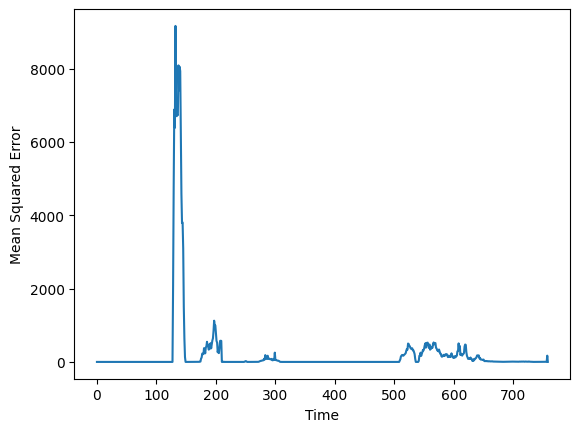

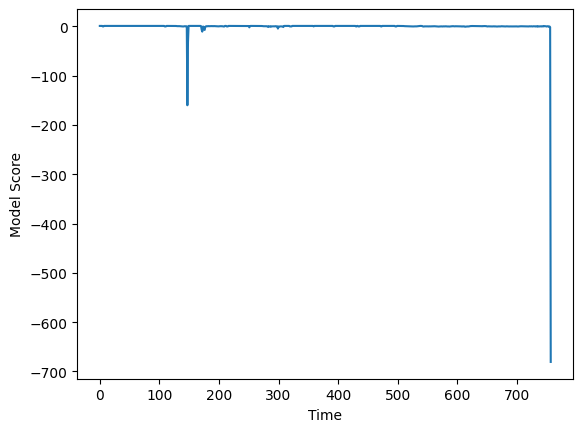

In [13]:
#Plot graph of error vs time
# print(performance)
import matplotlib.pyplot as plt
#Label x and y axis
plt.xlabel('Time')
plt.ylabel('Mean Squared Error')
plt.plot(error_list)
plt.show()
#Findings: 
#The MSE Error fluctuate randomly when using a rolling window 
#because the data points in each window can be quite different from each other, leading to variability in the model performance. There was an extreme outlier at t=5
#which might be due to an anomaly in the data. 

#Plotting model learning
plt.xlabel('Time')
plt.ylabel('Model Score')
plt.plot(performance)
plt.show()
#Plot the learning curve of the model


Total data rows:  3794
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.11403186605455035
Mean squared error: 0.09893425605536331
Mean squared error: 0.10487514863258023
Mean squared error: 0.08974876909481132
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 7.76686181740484
Mean squared error: 0.0
Mean squared error: 9.02039504479659
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0
Mean squared error: 0.0

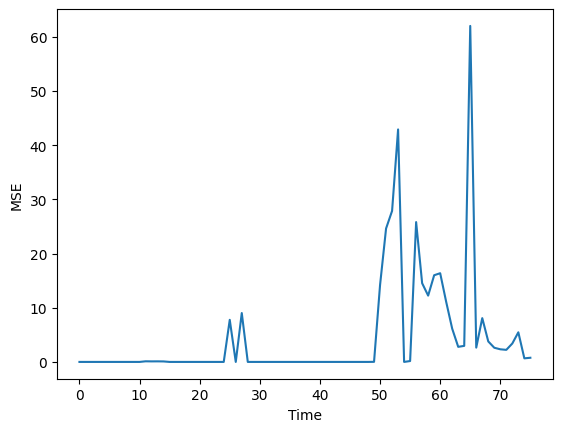

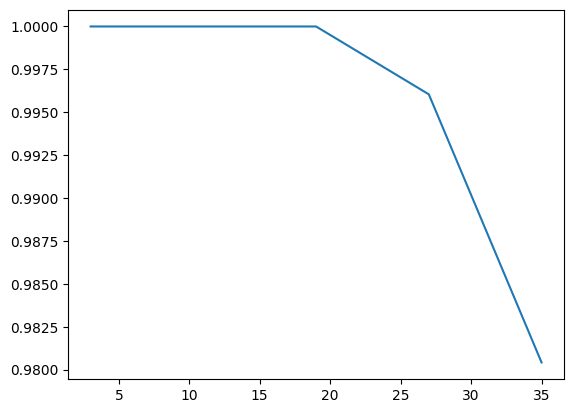

In [15]:
#================================================================================
# Prediction Model (using Decision Tree)
#================================================================================
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
# Load the data into a pandas dataframe
window_size = 500
shift_size = 50
data = pd.read_csv('denormalized_data.csv')
#Print total data rows
print("Total data rows: ", data['Gap'].count())
error_list = []

#initiliaze the decision tree regressor with depth of 5
model = DecisionTreeRegressor(max_depth=3)

for i in range(0, len(data), shift_size):
    window = data.iloc[i:i+window_size] 
    # Extract the features and target variable
    X = window[['start_district_hash', 'dest_district_hash', 'Price', 'weather', 'temperature', 'PM2.5']]
    y = window['Gap']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model on the training data
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate the mean squared error (MSE) to evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error:", mse)
    error_list.append(mse)

#Plot the graph of error vs time
import matplotlib.pyplot as plt
#Label x and y axis
plt.xlabel('Time')
plt.ylabel('MSE')
plt.plot(error_list)
plt.show()
#Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')